# Linear model to explains the relationship between car's mileage (mpg) and its other attributes.

## Import Libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split  #(Sklearn package's randomized data splitting function)

## Load and Review Data

In [2]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

## Drope/Ignore Car Name

In [4]:
df = df.drop('car name',axis=1)

## Dealing With Missing Values

In [5]:
# quick summary of data columns
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [7]:
# We can see horsepower is missing, cause it does not seem to be reqcognized as a numerical column!
# lets check the types of data
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [8]:

# lets check it by using 'isdigit()'. If the string is made of digits, it will store True else False

missing_value = pd.DataFrame(df.horsepower.str.isdigit())

#print missing_value = False!

df[missing_value['horsepower'] == False]   # prints only those rows where hosepower is false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [9]:
# Missing values have a'?''
# Replace missing values with NaN

df = df.replace('?', np.nan)
df[missing_value['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations. So Replacing NaN values with Median.

df = df.fillna(df.median())



In [10]:
df.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [11]:
median_fill = lambda x: x.fillna(x.median())
df = df.apply(median_fill,axis=0)

# converting the hp column from object / string type to float

df['horsepower'] = df['horsepower'].astype('float64')


### BiVariate Plots
* A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.
* Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity

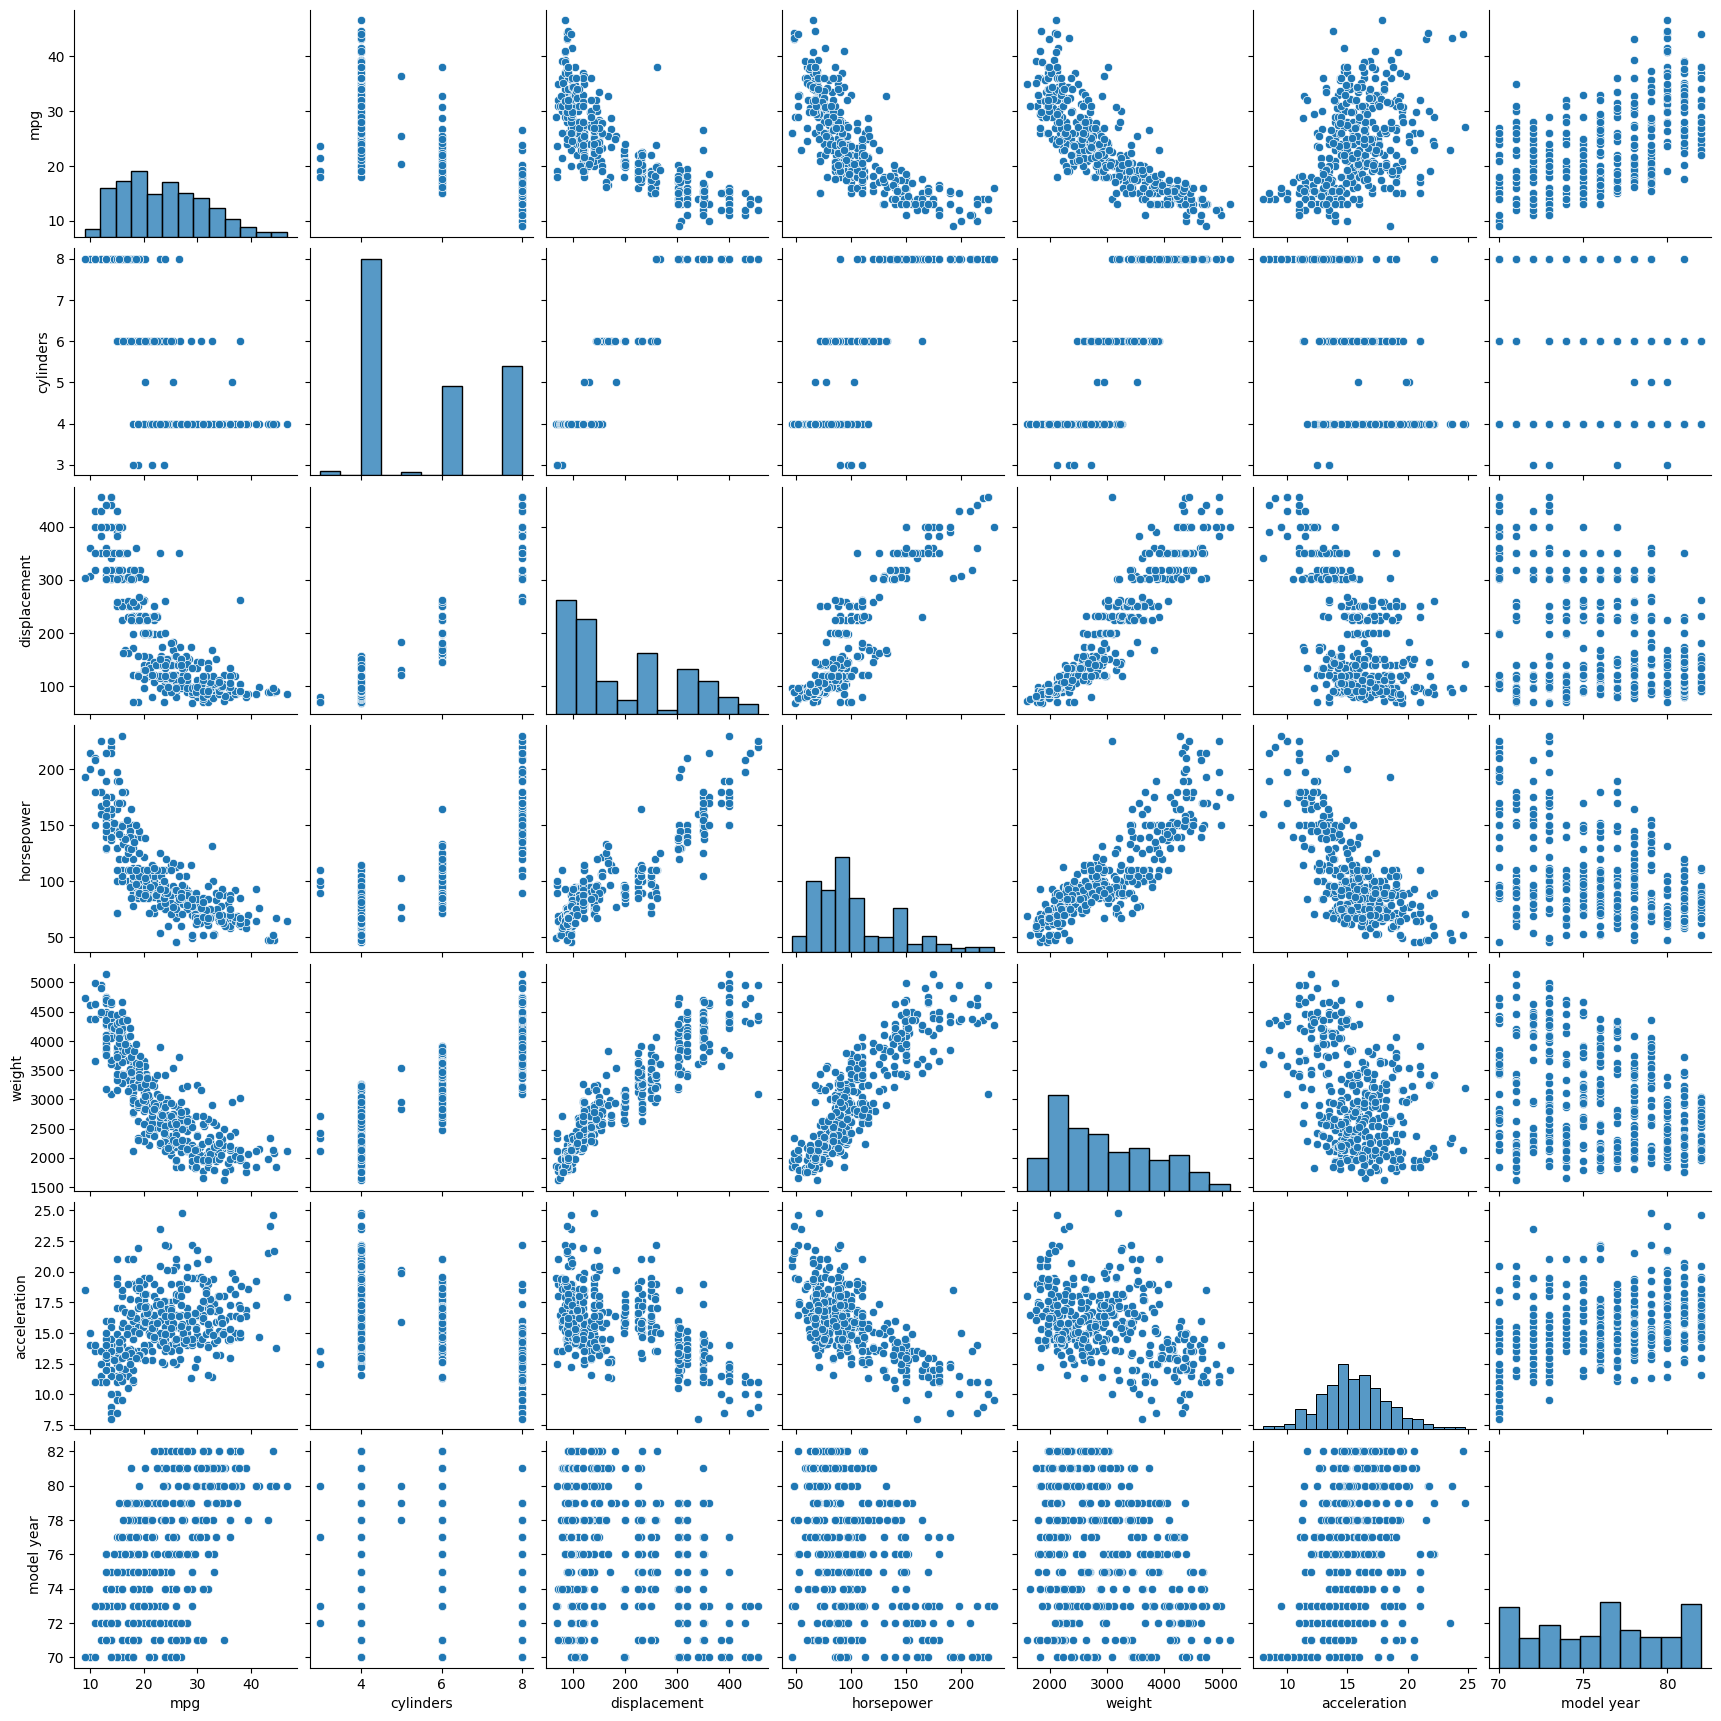

In [12]:
df_plot = df.iloc[:, 0:7]
sns.pairplot(df_plot)

# kde -> to plot density curve instead of histogram on the diag

<Axes: >

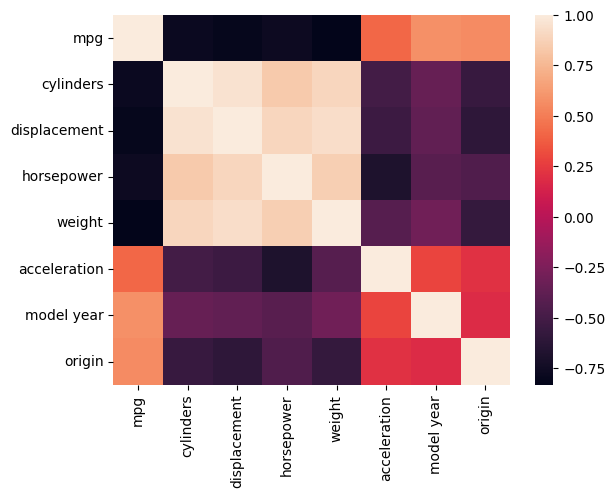

In [13]:
sns.heatmap(df.corr())

### Split Data

In [14]:
# lets build our linear model

# independant variables
X = df.drop(['mpg','origin'], axis=1)

# the dependent variable
y = df[['mpg']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Fit Linear Model

In [15]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

The coefficient for cylinders is -0.5626625898626254
The coefficient for displacement is 0.01885104901887669
The coefficient for horsepower is 0.01702634896482313
The coefficient for weight is -0.00841718660823859
The coefficient for acceleration is 0.21219359697046453
The coefficient for model year is 0.773169628347747


In [16]:
intercept = regression_model.intercept_[0]
print(f"The intercept for our model is {regression_model.intercept_}")

The intercept for our model is [-15.64738907]


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_regr = linear_model.LinearRegression()

poly_regr.fit(X_train2, y_train)

y_pred = poly_regr.predict(X_test2)

#print(y_pred)

In [20]:
print(X_test2)
print(y_pred)

[[1.00000e+00 8.00000e+00 3.51000e+02 ... 5.60790e+04 2.94934e+05
  9.58500e+02]
 [1.00000e+00 5.00000e+00 1.21000e+02 ... 5.87050e+04 2.36000e+05
  1.59200e+03]
 [1.00000e+00 4.00000e+00 8.10000e+01 ... 2.83360e+04 1.42560e+05
  1.30410e+03]
 ...
 [1.00000e+00 8.00000e+00 2.67000e+02 ... 5.40750e+04 2.84795e+05
  1.18500e+03]
 [1.00000e+00 8.00000e+00 3.83000e+02 ... 5.69825e+04 3.51805e+05
  8.16500e+02]
 [1.00000e+00 6.00000e+00 2.32000e+02 ... 5.94230e+04 2.57935e+05
  1.43780e+03]]
[[11.98039436]
 [29.32235877]
 [39.46793246]
 [34.64846519]
 [24.97661227]
 [14.61168772]
 [16.12990338]
 [20.87152286]
 [12.38870996]
 [25.44194296]
 [23.89761039]
 [19.87342477]
 [23.06060862]
 [19.70422026]
 [13.34088555]
 [19.46372674]
 [33.46394794]
 [26.0677061 ]
 [12.97678074]
 [24.63123039]
 [20.77205165]
 [31.32093484]
 [13.2460393 ]
 [38.45177152]
 [28.13554436]
 [23.11863593]
 [26.79837252]
 [31.30164107]
 [24.30972069]
 [34.46487789]
 [21.03884564]
 [32.43296662]
 [10.42699373]
 [25.48528396